In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

f=open('kode_negara_lengkap.json')
data=json.load(f)
df=pd.read_csv('produksi_minyak_mentah.csv')
print(df)

     kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5834         ZWE   2011      0.000
5835         ZWE   2012      0.000
5836         ZWE   2013      0.000
5837         ZWE   2014      0.000
5838         ZWE   2015      0.000

[5839 rows x 3 columns]


In [3]:


#HAPUS DATA YANG TIDAK ADA DALAM FILE JSON
def findName(code,jsonData):
  for elmt in jsonData:
    for key in elmt:
      if (elmt["alpha-3"] == code):
        return elmt["name"]
  print(f"NOT FOUND COUNTRY CODE: {code}")
  return "NAN"      
  

def findRegion(code,jsonData):
  for elmt in jsonData:
    for key in elmt:
      if (elmt["alpha-3"]) == code:
        return elmt["region"]
  print(f"NOT FOUND COUNTRY CODE: {code}")
  return "NAN"

def findSubRegion(code,jsonData):
  for elmt in jsonData:
    for key in elmt:
      if (elmt["alpha-3"]) == code:
        return elmt["sub-region"]
  print(f"NOT FOUND COUNTRY CODE: {code}")
  return "NAN"

def findSubRegion(code,jsonData):
  for elmt in jsonData:
    for key in elmt:
      if (elmt["alpha-3"]) == code:
        return elmt["country-code"]
  print(f"NOT FOUND COUNTRY CODE: {code}")
  return "NAN"
  
df["nama_lengkap_negara"] = df["kode_negara"]
df["region"] = df["kode_negara"]
df["sub-region"] = df["kode_negara"]
df["country-code"] = df["kode_negara"]



In [4]:


for i in range(len(df)):
  df["nama_lengkap_negara"][i] = findName(df["nama_lengkap_negara"][i],data)
  df["region"][i] = findRegion(df["region"][i],data)
  df["sub-region"][i] = findSubRegion(df["sub-region"][i],data)
  df["country-code"][i] = findSubRegion(df["country-code"][i],data)


C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/1887991466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nama_lengkap_negara"][i] = findName(df["nama_lengkap_negara"][i],data)
C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/1887991466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"][i] = findRegion(df["region"][i],data)
C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/1887991466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CODE: OEU
NOT FOUND COUNTRY CO

In [5]:

notinjson=['WLD','G20','EU28','OECD']
for j in notinjson:
    df=df[df['kode_negara']!=j]
print(df)

     kode_negara  tahun   produksi nama_lengkap_negara   region sub-region  \
0            AUS   1971  14226.194           Australia  Oceania        036   
1            AUS   1972  15029.094           Australia  Oceania        036   
2            AUS   1973  18720.577           Australia  Oceania        036   
3            AUS   1974  18498.696           Australia  Oceania        036   
4            AUS   1975  19736.070           Australia  Oceania        036   
...          ...    ...        ...                 ...      ...        ...   
5834         ZWE   2011      0.000            Zimbabwe   Africa        716   
5835         ZWE   2012      0.000            Zimbabwe   Africa        716   
5836         ZWE   2013      0.000            Zimbabwe   Africa        716   
5837         ZWE   2014      0.000            Zimbabwe   Africa        716   
5838         ZWE   2015      0.000            Zimbabwe   Africa        716   

     country-code  
0             036  
1             036  
2  

C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/2731956681.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['produksi']=data1['produksi'].astype(str).str.replace('.','').astype(float)


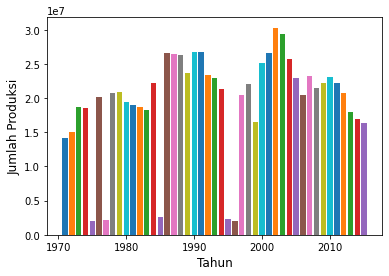

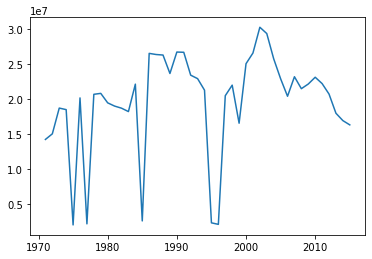

In [6]:
#PROGRAM MEMBUAT JUMLAH MINYAK MENTAH TERHADAP TAHUN
import matplotlib.pyplot as plt
from matplotlib import cm

inputan= 'Australia'#str(input('MASUKKAN NEGARA: '))\

data1=pd.DataFrame(df,columns=['tahun','produksi'])
data1=data1.loc[df['nama_lengkap_negara']==inputan]
data1['produksi']=data1['produksi'].astype(str).str.replace('.','').astype(float)

jumlah_produksi=data1['produksi']
tahun_produksi=data1['tahun']
data1=data1.to_string(index=False)



#BUAT PLOT
fig, ax = plt.subplots()
#BUAT WARNA
cmap_name = 'tab10'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(jumlah_produksi)]
#BUAT PLOT
ax.bar(tahun_produksi, jumlah_produksi, color=colors)
ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel("Jumlah Produksi", fontsize=12)

plt.show()

#LINE PLOT

plt.plot(tahun_produksi, jumlah_produksi)
plt.show()

C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/2804244664.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)


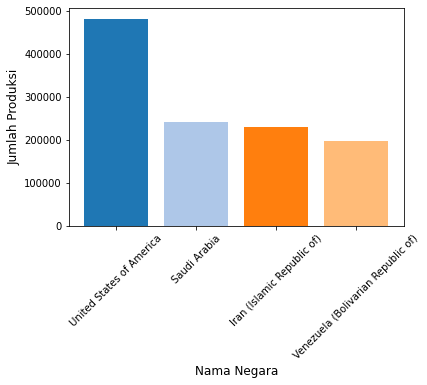

In [7]:
inputan_tahun=1971#input('masukkan Tahun: ')
inputan_peringkat_ke=4#input('masukkan peringkat: ')

data2=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi'])
data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)

data2=df.loc[df["tahun"] ==inputan_tahun]
data2=data2.sort_values(by=('produksi'),ascending=False)
data3=data2.head(inputan_peringkat_ke)

#BUAT PLOT
fig, ax = plt.subplots()
#BUAT WARNA
cmap_name = 'tab20'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len('produksi')]
#BUAT PLOT
ax.bar(data3['nama_lengkap_negara'], data3['produksi'], color=colors)
ax.set_xlabel('Nama Negara', fontsize=12)
ax.set_ylabel("Jumlah Produksi", fontsize=12)
plt.xticks(rotation=45)

#for index,value in enumerate (data3['produksi']):
  #  plt.text(value,index,str(value))
plt.show()


C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/1066279764.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)


                    nama_lengkap_negara      produksi
74                         Saudi Arabia  1.771177e+07
29             United States of America  1.672414e+07
73                   Russian Federation  1.070275e+07
57           Iran (Islamic Republic of)  8.376461e+06
30                                  NAN  8.360740e+06
135  Venezuela (Bolivarian Republic of)  6.573346e+06


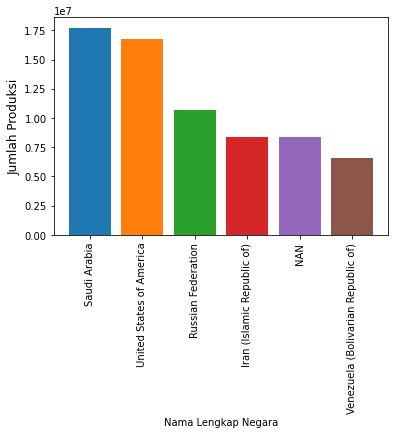

In [8]:

list_masukan_banyak_urutan= 6 #input('masukkan jumlah urutan: ')

data4=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi'])
data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)
negaraunq=list(df['nama_lengkap_negara'].unique())

list_produksi=df['produksi']
list_sum=[]
data5=pd.DataFrame(negaraunq,columns=['nama_lengkap_negara'])

for i in negaraunq:
    a=df.loc[df['nama_lengkap_negara']==i,'produksi'].sum()
    list_sum.append(a)

data5['produksi']=list_sum


data5=data5.sort_values(by=['produksi'],ascending=False)

data5=data5.head(list_masukan_banyak_urutan)
print(data5)

#BUAT PLOT
fig, ax = plt.subplots()
#BUAT WARNA
cmap_name = 'tab10'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len('produksi')]
#BUAT PLOT
ax.bar(data5['nama_lengkap_negara'], data5['produksi'], color=colors)
ax.set_xlabel('Nama Lengkap Negara', fontsize=10)
ax.set_ylabel("Jumlah Produksi", fontsize=12)
plt.xticks(rotation=90)

#for index,value in enumerate (data3['produksi']):
  #  plt.text(value,index,str(value))
plt.show()

In [9]:
#MEMBUAT DATA MAKS 

inputan_tahun=1971#input('masukkan Tahun: ')

data2=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi'])
data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)

data2=df.loc[df["tahun"] ==inputan_tahun]
data2=data2.sort_values(by=('produksi'),ascending=False)
data3=data2.head(1)
df_no_indices = data3.to_string(index=False)
print('\n')

print(data3)


#AKUMULASI TAHUNAN TERBESAR
list_masukan_banyak_urutan= 1 #input('masukkan jumlah urutan: ')

data4=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi'])
data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)
negaraunq=list(df['kode_negara'].unique())

list_produksi=df['produksi']
list_sum=[]
data5=pd.DataFrame(negaraunq,columns=['kode negara'])


for i in negaraunq:
    a=df.loc[df['kode_negara']==i,'produksi'].sum()
    list_sum.append(a)

data5['produksi']=list_sum

data5=data5.sort_values(by=['produksi'],ascending=False)

data5=data5.head(list_masukan_banyak_urutan)
df_no_indices = data5.to_string(index=False)
print('\n')

print(df_no_indices)

import json
f=open('kode_negara_lengkap.json')
data=json.load(f)

for i in data:
    if i['alpha-3'] == 'SAU':
        print('Nama Lengkap Negara: ',i['name'])
        print('Kode Negara: ',i['country-code'])
        print('Region: ',i['region'])
        print('Sub-Region: ',i['sub-region']) 


C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/300822579.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)




     kode_negara  tahun   produksi       nama_lengkap_negara    region  \
1305         USA   1971  482149.55  United States of America  Americas   

     sub-region country-code  
1305        840          840  


kode negara     produksi
        SAU 17711766.321
Nama Lengkap Negara:  Saudi Arabia
Kode Negara:  682
Region:  Asia
Sub-Region:  Western Asia


C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/300822579.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)


In [10]:
#membuat data terkecil tidak sama dengan nol 

#MEMBUAT DATA MAKS 

inputan_tahun=1971#input('masukkan Tahun: ')

data2=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi','region','sub-region','country-code'])
data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)
data2=data2[data2['produksi']!=0]

data2=data2.loc[df["tahun"] ==inputan_tahun]
data2=data2.sort_values(by=('produksi'),ascending=False)
data3=data2.tail(1)
df_no_indices = data3.to_string(index=False)
print(df_no_indices)

print('\n')

#AKUMULASI TAHUNAN TERKECIL
list_masukan_banyak_urutan= 1 #input('masukkan jumlah urutan: ')

data4=pd.DataFrame(df,columns=['tahun','kode_negara','produksi'])
data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)
negaraunq=list(df['kode_negara'].unique())

list_produksi=data4['produksi']
list_sum=[]
data5=pd.DataFrame(negaraunq,columns=['kode_negara'])
for i in negaraunq:
    a=data4.loc[df['kode_negara']==i,'produksi'].sum()
    list_sum.append(a)

data5['produksi']=list_sum

data5=data5.sort_values(by=['produksi'],ascending=False)
data5=data5[data5['produksi']!=0]
data5=data5.tail(list_masukan_banyak_urutan)
df_no_indices = data5.to_string(index=False)
print(df_no_indices)

import json
f=open('kode_negara_lengkap.json')
data=json.load(f)

for i in data:
    if i['alpha-3'] == 'SEN':
        print('Nama Lengkap Negara: ',i['name'])
        print('Kode Negara: ',i['country-code'])
        print('Region: ',i['region'])
        print('Sub-Region: ',i['sub-region']) 

 tahun nama_lengkap_negara  produksi region sub-region country-code
  1971             Morocco    2139.0 Africa        504          504




C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/466256347.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2['produksi']=data2['produksi'].apply(str).str.replace('.','').astype(float)
C:\Users\NISOYA~1\AppData\Local\Temp/ipykernel_24696/466256347.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data4['produksi']=data4['produksi'].apply(str).str.replace('.','').astype(float)


kode_negara     produksi
        SAU 1.695543e+10
        USA 1.323386e+10
        RUS 9.989339e+09
        IRN 7.921566e+09
        OEU 7.126711e+09
        VEN 5.998416e+09
        MEX 4.951418e+09
        KWT 3.970176e+09
        IRQ 3.969003e+09
        ARE 3.861737e+09
        NGA 3.744856e+09
        CAN 3.618727e+09
        GBR 3.310952e+09
        NOR 3.133738e+09
        LBY 2.918035e+09
        IDN 2.521788e+09
        DZA 2.042144e+09
        BRA 1.982913e+09
        CHN 1.902971e+09
        AGO 1.519267e+09
        EGY 1.472833e+09
        OMN 1.298083e+09
        KAZ 1.235659e+09
        IND 1.149007e+09
        QAT 1.086193e+09
        MYS 1.069637e+09
        COL 1.056705e+09
        AUS 8.845951e+08
        SYR 6.482290e+08
        AZE 5.123030e+08
        GAB 4.836259e+08
        COG 3.708758e+08
        BHR 3.401649e+08
        BRN 3.382164e+08
        YEM 3.281880e+08
        DNK 3.267349e+08
        ARG 3.176108e+08
        TTO 3.167523e+08
        VNM 3.131687e+08


In [11]:

dataz=pd.DataFrame(df,columns=['tahun','nama_lengkap_negara','produksi','region','sub-region','country-code'])
dataz=dataz[dataz['produksi'] == 0]
data6=dataz.groupby('nama_lengkap_negara',as_index=False)
data6.first()
#SOAL D END

,nama_lengkap_negara,tahun,produksi,region,sub-region,country-code
0,Armenia,1990,0.0,Asia,051,051
1,Bangladesh,1971,0.0,Asia,050,050
2,Belgium,1971,0.0,Europe,056,056
3,Benin,1971,0.0,Africa,204,204
4,Bosnia and Herzegovina,1990,0.0,Europe,070,070
...,...,...,...,...,...,...
61,Uruguay,1971,0.0,Americas,858,858
62,Viet Nam,1971,0.0,Asia,704,704
63,Yemen,1971,0.0,Asia,887,887
64,Zambia,1971,0.0,Africa,894,894
